# Global Power Plant Database

# Problem Statement

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the 
 model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw   

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn as sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# EDA

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

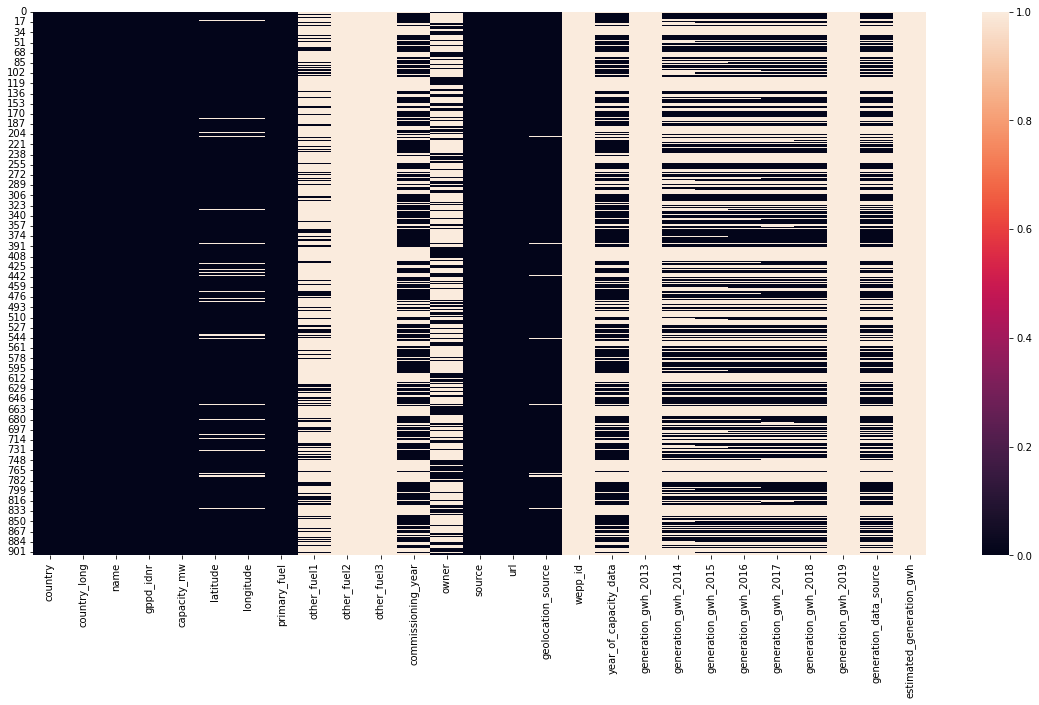

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [8]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [9]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [10]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [11]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [12]:
df['generation_gwh_2019'].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

In [13]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [14]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [15]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [16]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [17]:
df['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [18]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

# DROPPING OF COLUMNS WITH NAN DATA AND LESS THAN 50% DATA OR CONTAINING ONLY 1 DATA

In [19]:
drop=['name','gppd_idnr','country','country_long','other_fuel1','other_fuel2','other_fuel3','year_of_capacity_data'
      ,'generation_gwh_2019','generation_data_source','generation_gwh_2013','estimated_generation_gwh'
      ,'wepp_id','owner','generation_gwh_2014','url']

for i in drop:
    df.drop([i],axis=1,inplace=True)

In [20]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,5916.370,6243.000000,5385.579736,7279.000000


In [21]:
df.shape

(907, 11)

In [22]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [23]:
df[df['geolocation_source'].isnull()] # fill nan by mode

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
25,50.00,NaN,NaN,Solar,2015.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
67,5.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
192,125.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
208,75.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
250,28.00,NaN,NaN,Solar,2014.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
386,100.00,NaN,NaN,Solar,2013.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
440,4.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
502,50.00,NaN,NaN,Solar,2014.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
545,27.65,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
655,22.50,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN


In [24]:
df[df['latitude'].isnull()]

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
14,9.00,NaN,NaN,Hydro,1987.0,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN
25,50.00,NaN,NaN,Solar,2015.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
42,450.00,NaN,NaN,Hydro,2015.0,Central Electricity Authority,WRI,55.3220,1750.18510,1812.84025,1848.620450
45,600.00,NaN,NaN,Coal,2015.0,Central Electricity Authority,WRI,1437.9547,2800.00000,2120.68000,2553.000000
67,5.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
72,25.20,NaN,NaN,Oil,2000.0,Central Electricity Authority,WRI,0.0000,0.00000,0.00000,0.000000
178,5.00,NaN,NaN,Hydro,1997.0,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN
192,125.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
201,15.00,NaN,NaN,Hydro,1996.0,Central Electricity Authority,WRI,NaN,NaN,NaN,NaN
208,75.00,NaN,NaN,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN


In [25]:
df['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='Density'>

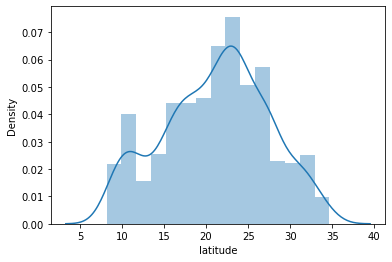

In [26]:
sns.distplot(df['latitude']) #fill nan with mean latitude and logitude

In [27]:
df['commissioning_year'].mean()

1997.0910815939278

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

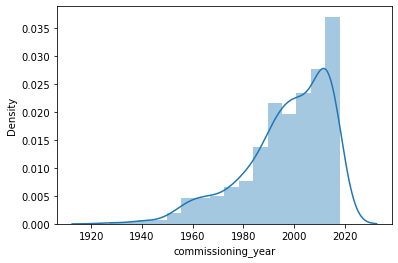

In [28]:
sns.distplot(df['commissioning_year']) #fill nan with mean

In [29]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(np.mean(df['generation_gwh_2018']))

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)



df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,5916.370000,6243.000000,5385.579736,7279.000000


<AxesSubplot:>

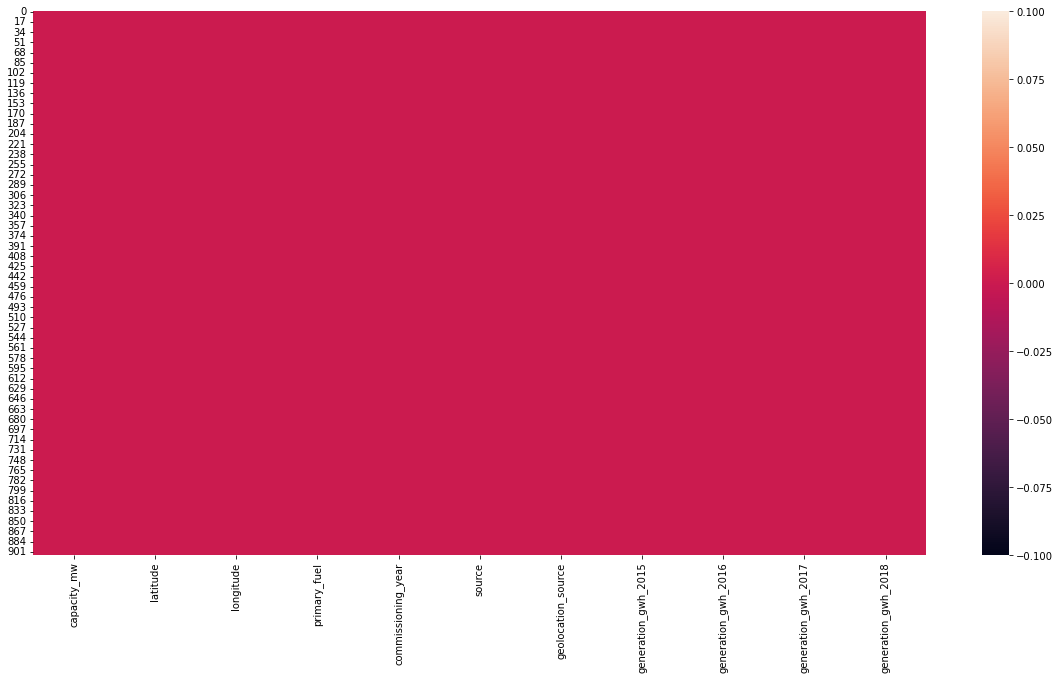

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

# Solved Null Values

In [31]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,30539.000000,30015.000000,35116.000000,35136.000000


SKEWNESS PRESENT MEAN IS NOT EQUAL TO MEDIAN AND MODE

STD BEEN SEEN IN SOME COLUMN

# Data Visualization

<AxesSubplot:title={'center':'primary_fuel vs capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

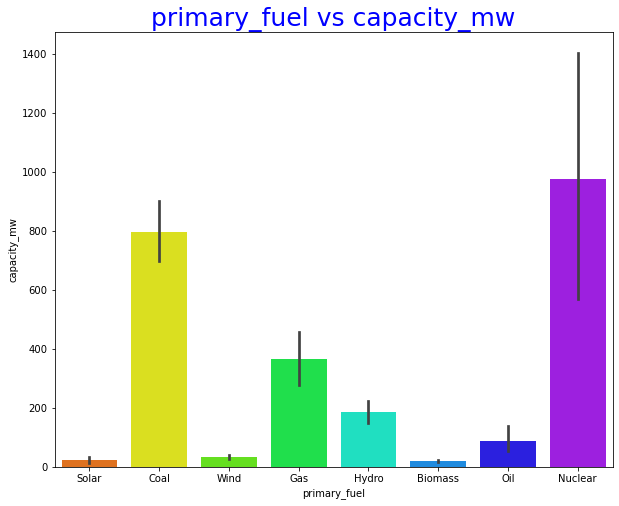

In [32]:
plt.figure(figsize=(10,8))

plt.title("primary_fuel vs capacity_mw",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.barplot(data=df,y='capacity_mw',x='primary_fuel',palette='gist_rainbow')

Coal and Nuclear as a fuel mostly generate higher capacity power above 800mw.

WHEREAS SOLAR AND BOIMASS ARE LESS USED OR GENERATING POWER

<AxesSubplot:title={'center':'primary_fuel vs geolocation_source'}, xlabel='geolocation_source', ylabel='primary_fuel'>

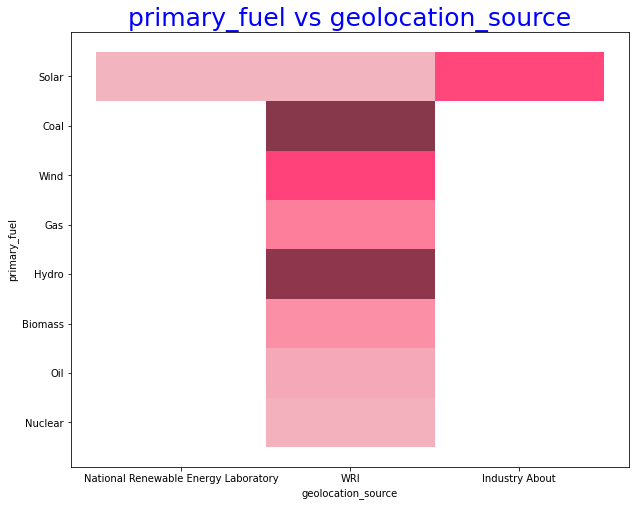

In [33]:
plt.figure(figsize=(10,8))

plt.title("primary_fuel vs geolocation_source",fontsize= 25,
        fontweight =200,
        color = 'blue',)

sns.histplot(data=df,y='primary_fuel',x='geolocation_source',color='pink')

National Renewable Energy Laboratory and INDUSTRY ABOUT record solar as fuel.

rest all fuel consumption record are from WRI.

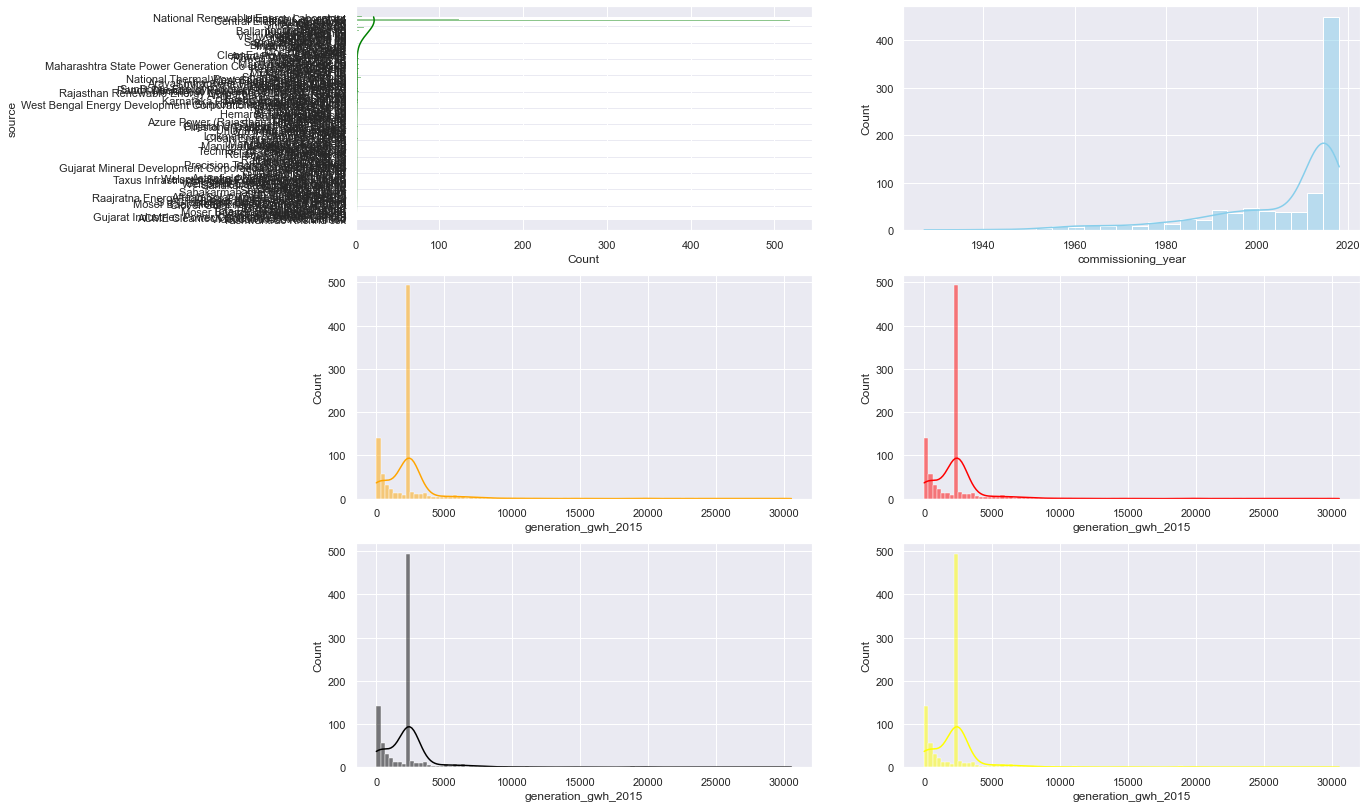

In [34]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=df, y="source", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="commissioning_year", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="generation_gwh_2015", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="generation_gwh_2015", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="generation_gwh_2015", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df, x="generation_gwh_2015", kde=True, ax=axs[2, 1], color='yellow');

# Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order --> LabelEncoder is used in this case

In [35]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

In [37]:
df['primary_fuel'] = LE.fit_transform(df['primary_fuel'])
df['source'] = LE.fit_transform(df['source'])
df['geolocation_source'] = LE.fit_transform(df['geolocation_source'])
df.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000


# Correlation

In [38]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.004072,-2.421218e-01,2.048653e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.034519,5.592656e-02,-1.842751e-01,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,-0.159025,-2.393334e-01,2.523426e-01,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.164947,5.361263e-02,-4.832168e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,1.000000,3.222222e-01,-2.599290e-01,1.218816e-01,1.411613e-01,1.413426e-01,1.442491e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.322222,1.000000e+00,-5.057202e-01,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.259929,-5.057202e-01,1.000000e+00,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.121882,-2.160931e-17,-6.339264e-18,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.141161,-4.925637e-17,2.904016e-17,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.141343,-1.284552e-16,8.066490e-17,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01


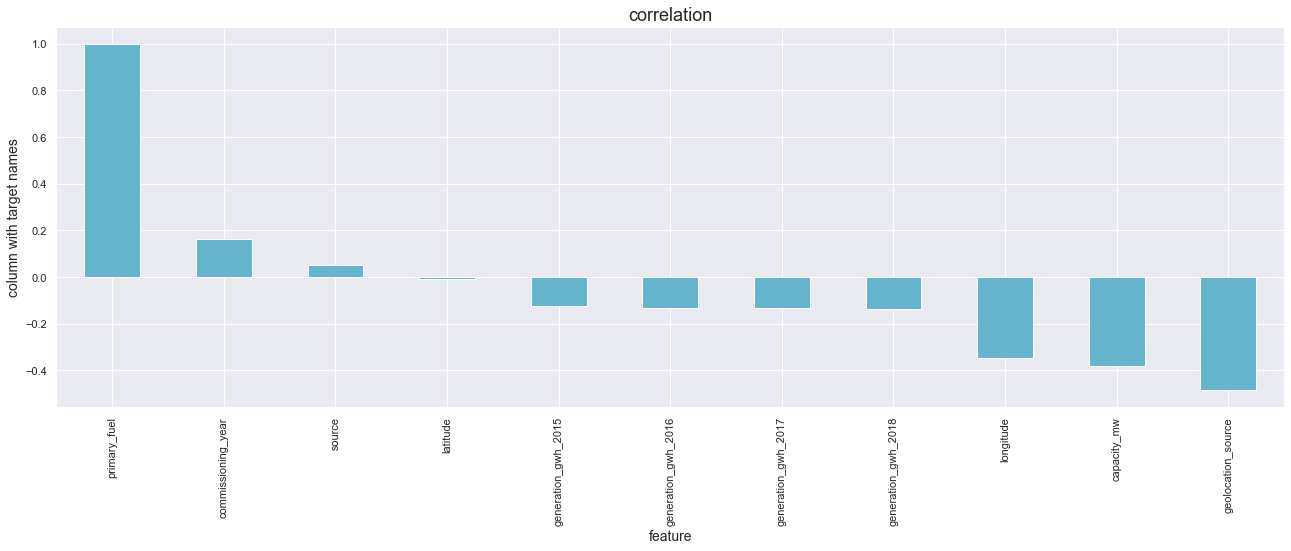

In [39]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

<AxesSubplot:>

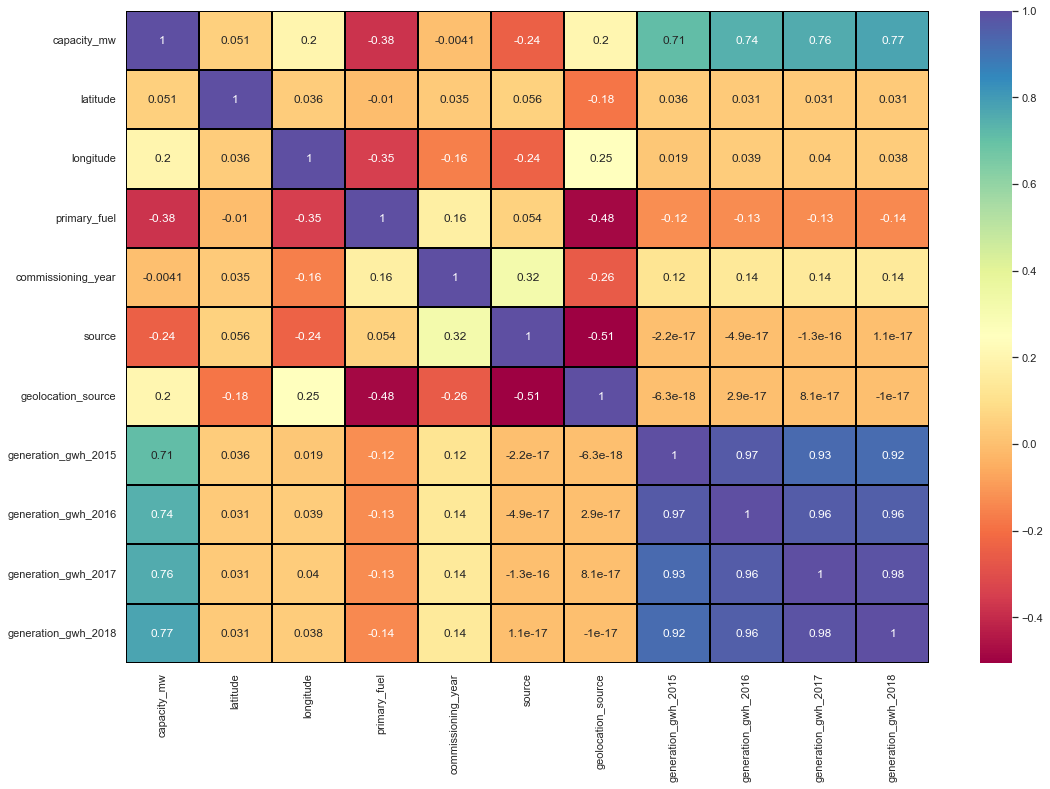

In [40]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='Spectral',annot=True,linecolor='Black',linewidths=.2)

geolocation_source is negatively correlated to primary_fuel.

capacity_mw is also negatively correlated primary_fuel.

# CHECKING OUTLIERS

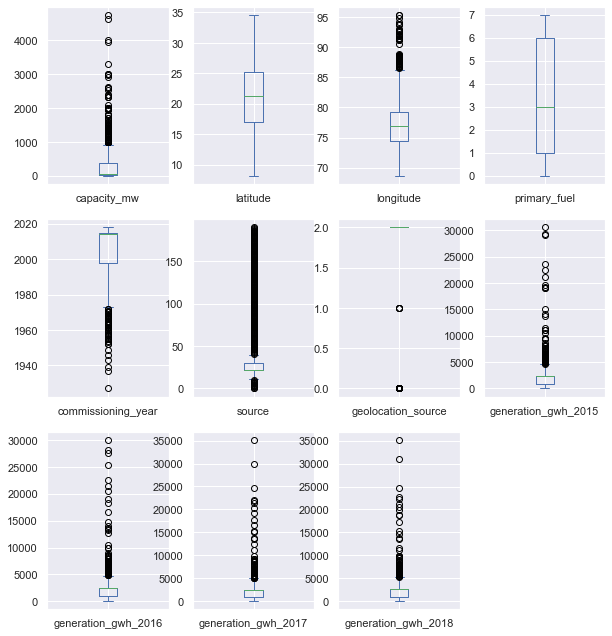

In [41]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.show()

# REMOVING OUTLIERS BY Z SCORE

In [42]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.225688,0.407327,1.460215,1.083349,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.587311,0.593788,0.967877,0.661679,2.917019,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,0.116179,1.682394,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,0.439989,2.889052,0.529164,0.037788,0.489662,0.394241,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,0.125479,1.027976,0.967877,0.661679,0.489662,0.394241,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,0.725267,0.489662,0.394241,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,1.366853,0.145644,1.225688,0.661679,0.743019,2.560940,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.974707,0.391673,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.518793,0.772866,0.967877,0.661679,0.339596,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16


In [43]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 147,
       179, 183, 191, 209, 209, 209, 209, 209, 222, 244, 299, 308, 308,
       308, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364, 364,
       364, 364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 499, 519, 538, 541,
       546, 573, 577, 583, 601, 621, 638, 648, 648, 648, 648, 648, 657,
       657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 706,
       709, 721, 721, 721, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       728, 767, 786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808,
       808, 818, 832, 847, 848, 870, 871, 879, 880, 880, 880, 880, 880,
       895, 900], dtype=int64), array([ 0,  7,  8,  9, 10,  5,  5,  0,  7,  8,  9, 10,  0,  2,  2,  5,  0,
        7,  8,  9, 10,  4,  2,  5,  0,  7,  8,  9, 10,  5,  2,  2,  2,  4,
        5,  2,  0,  0,  7,  8,  9, 10,  4,  0,  2,  2,  4,  4,  4,  0,  4,
        0,  7,  8,  9,

In [44]:
df1=df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,77,0,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,59,2,2428.226946,2467.936859,2547.759305,2600.804099


# Percentage loss

In [45]:
loss_percent=(907-837)/837*100
print(loss_percent,'%')

8.363201911589007 %


# Separating Dataset TO PREDICT

1)PRIMARY FUEL

In [46]:
#independent column
x=df1.drop(['primary_fuel'],axis=1)
#target
y=df1['primary_fuel']

In [47]:
x.shape

(836, 10)

In [48]:
y.shape

(836,)

# Skewness check

In [49]:
df1.skew()

capacity_mw            1.953584
latitude              -0.112788
longitude              0.912092
primary_fuel           0.414735
commissioning_year    -1.506227
source                 1.788418
geolocation_source    -2.108238
generation_gwh_2015    1.436056
generation_gwh_2016    1.424378
generation_gwh_2017    1.312563
generation_gwh_2018    1.357218
dtype: float64

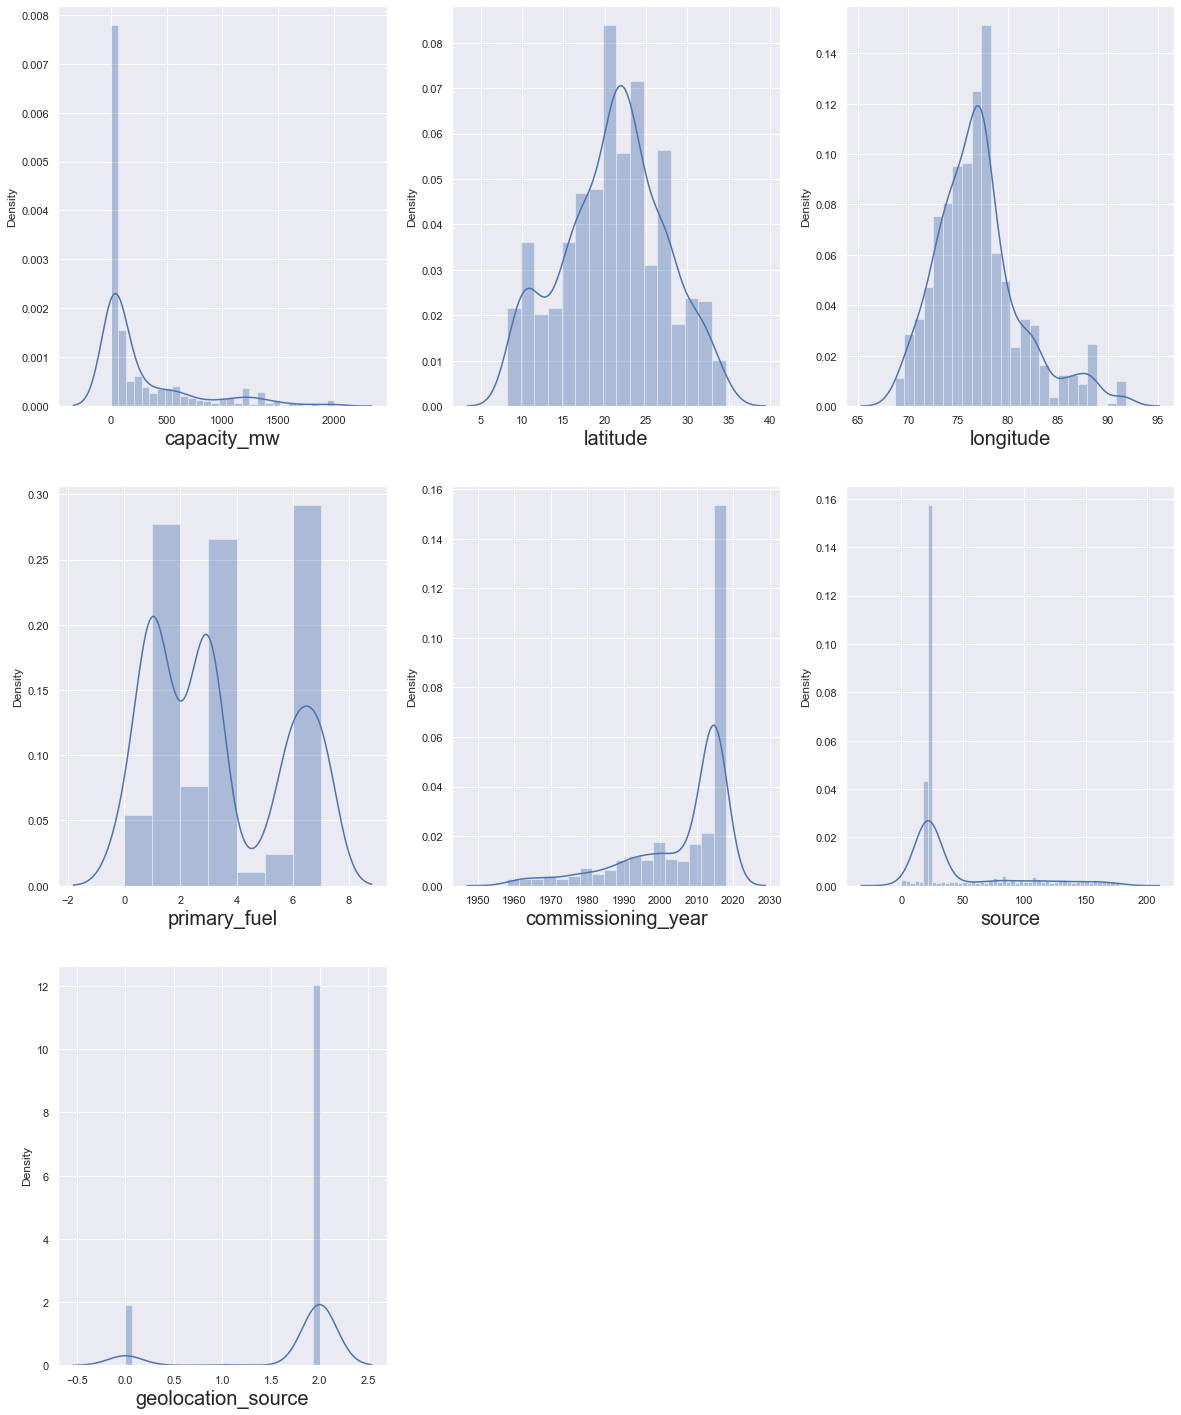

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


CAPACITY,SOURCE,YEAR COLUMNS ARE HAVING SKEWNESS

In [51]:
from sklearn.preprocessing import power_transform
df1['capacity_mw']=power_transform(x,method='yeo-johnson')
df1['source']=power_transform(x,method='yeo-johnson')
df1['geolocation_source']=power_transform(x,method='yeo-johnson')

df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.672448,28.1839,73.2407,6,2011.0,-1.672448,-1.672448,2428.226946,2467.936859,2547.759305,2600.804099
1,0.208329,24.7663,74.6090,1,2015.0,0.208329,0.208329,2428.226946,2467.936859,2547.759305,2600.804099
2,-0.286717,21.9038,69.3732,7,2015.0,-0.286717,-0.286717,2428.226946,2467.936859,2547.759305,2600.804099
3,0.380670,23.8712,91.3602,2,2004.0,0.380670,0.380670,843.747000,886.004428,663.774500,626.239128
4,1.743575,21.9603,82.4091,1,2015.0,1.743575,1.743575,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1.682967,16.2949,77.3568,1,2016.0,1.682967,1.682967,0.994875,233.596650,865.400000,686.500000
903,-1.594917,12.8932,78.1654,6,2015.0,-1.594917,-1.594917,2428.226946,2467.936859,2547.759305,2600.804099
904,-0.518597,15.2758,75.5811,7,2015.0,-0.518597,-0.518597,2428.226946,2467.936859,2547.759305,2600.804099
905,0.098861,24.3500,73.7477,1,2015.0,0.098861,0.098861,2428.226946,2467.936859,2547.759305,2600.804099


# Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.63459553,  1.15424116, -0.88928683, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [-0.41190268,  0.59783917, -0.57132438, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [-0.54901619,  0.13181017, -1.78800773, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       ...,
       [-0.5809627 , -0.94726064, -0.34542998, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [-0.4538762 ,  0.53006349, -0.77147132, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [-0.60194946, -1.81686668,  0.09508849, ...,  0.1753934 ,
         0.17612711,  0.18457261]])

# Splitting the DataFrame and Model selection


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=11)

# 1)LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is
 0.8260869565217391
Confusion Matrix
 [[ 6  2  0  0  0  0  1]
 [ 1 30  1  3  0  0  5]
 [ 1  4  2  5  1  0  0]
 [ 0  4  1 43  0  0  0]
 [ 2  0  0  1  0  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.75      0.75      0.75        40
           2       0.50      0.15      0.24        13
           3       0.83      0.90      0.86        48
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        37
           7       0.85      1.00      0.92        34

    accuracy                           0.83       184
   macro avg       0.65      0.64      0.63       184
weighted avg       0.80      0.83      0.81       184



Cross Validation

In [55]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 74.52153110047847 and Accuracy score is 82.6086956521739
At cross fold 3 the Cross Val score is 75.12097848602838 and Accuracy score is 82.6086956521739
At cross fold 4 the Cross Val score is 75.83732057416267 and Accuracy score is 82.6086956521739
At cross fold 5 the Cross Val score is 75.36213287710294 and Accuracy score is 82.6086956521739
At cross fold 6 the Cross Val score is 75.95837615621788 and Accuracy score is 82.6086956521739
At cross fold 7 the Cross Val score is 75.60224089635854 and Accuracy score is 82.6086956521739
At cross fold 8 the Cross Val score is 75.60210622710622 and Accuracy score is 82.6086956521739
At cross fold 9 the Cross Val score is 76.19474313022701 and Accuracy score is 82.6086956521739


# 2) DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

Accuracy score
 0.8967391304347826
Confusion Matrix
 [[ 7  2  0  0  0  0  0]
 [ 0 37  2  0  0  0  1]
 [ 0  3  6  2  2  0  0]
 [ 0  3  1 43  1  0  0]
 [ 0  2  0  0  1  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.79      0.93      0.85        40
           2       0.67      0.46      0.55        13
           3       0.96      0.90      0.92        48
           5       0.25      0.33      0.29         3
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        34

    accuracy                           0.90       184
   macro avg       0.80      0.77      0.78       184
weighted avg       0.90      0.90      0.90       184



CROSS VALIDATION

In [57]:
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 79.06698564593302 and Accuracy score is 89.67391304347827
At cross fold 3 the Cross Val score is 79.78305527620915 and Accuracy score is 89.67391304347827
At cross fold 4 the Cross Val score is 79.78468899521532 and Accuracy score is 89.67391304347827
At cross fold 5 the Cross Val score is 80.26304533789563 and Accuracy score is 89.67391304347827
At cross fold 6 the Cross Val score is 80.7425488180884 and Accuracy score is 89.67391304347827
At cross fold 7 the Cross Val score is 80.2641056422569 and Accuracy score is 89.67391304347827
At cross fold 8 the Cross Val score is 78.94459706959707 and Accuracy score is 89.67391304347827
At cross fold 9 the Cross Val score is 81.21915744636641 and Accuracy score is 89.67391304347827


# 3) RandomForestClassifier


In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.907608695652174
Confusion Matrix
 [[ 7  2  0  0  0  0  0]
 [ 0 37  2  0  0  0  1]
 [ 0  3  5  3  2  0  0]
 [ 0  2  0 46  0  0  0]
 [ 0  1  1  0  1  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.82      0.93      0.87        40
           2       0.62      0.38      0.48        13
           3       0.94      0.96      0.95        48
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        34

    accuracy                           0.91       184
   macro avg       0.81      0.77      0.78       184
weighted avg       0.90      0.91      0.90       184



CROSS VALIDATION

In [59]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 82.5358851674641 and Accuracy score is 90.76086956521739
At cross fold 3 the Cross Val score is 84.9281864830716 and Accuracy score is 90.76086956521739
At cross fold 4 the Cross Val score is 84.44976076555024 and Accuracy score is 90.76086956521739
At cross fold 5 the Cross Val score is 85.0484744796122 and Accuracy score is 90.76086956521739
At cross fold 6 the Cross Val score is 85.88643371017471 and Accuracy score is 90.76086956521739
At cross fold 7 the Cross Val score is 85.52721088435374 and Accuracy score is 90.76086956521739
At cross fold 8 the Cross Val score is 85.4040750915751 and Accuracy score is 90.76086956521739
At cross fold 9 the Cross Val score is 85.16700431146434 and Accuracy score is 90.76086956521739


# 4) SUPPORT VECTOR CLASSIFIER

In [60]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

Accuracy score
 0.8478260869565217
Confusion Matrix
 [[ 6  2  0  0  0  0  1]
 [ 1 33  0  1  0  0  5]
 [ 1  3  1  8  0  0  0]
 [ 0  3  0 45  0  0  0]
 [ 2  0  0  1  0  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.80      0.82      0.81        40
           2       1.00      0.08      0.14        13
           3       0.82      0.94      0.87        48
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        37
           7       0.85      1.00      0.92        34

    accuracy                           0.85       184
   macro avg       0.72      0.64      0.63       184
weighted avg       0.85      0.85      0.82       184



# CROSS VALIDATION

In [61]:
test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 76.19617224880382 and Accuracy score is 84.78260869565217
At cross fold 3 the Cross Val score is 77.39442854318696 and Accuracy score is 84.78260869565217
At cross fold 4 the Cross Val score is 77.15311004784688 and Accuracy score is 84.78260869565217
At cross fold 5 the Cross Val score is 76.91973196464215 and Accuracy score is 84.78260869565217
At cross fold 6 the Cross Val score is 77.75265501884206 and Accuracy score is 84.78260869565217
At cross fold 7 the Cross Val score is 76.91676670668267 and Accuracy score is 84.78260869565217
At cross fold 8 the Cross Val score is 77.27793040293041 and Accuracy score is 84.78260869565217
At cross fold 9 the Cross Val score is 77.03495922289751 and Accuracy score is 84.78260869565217


# 5) GradientBoostingClassifier


In [62]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))

Accuracy score
 0.907608695652174
Confusion Matrix
 [[ 7  2  0  0  0  0  0  0]
 [ 0 36  2  0  1  0  0  1]
 [ 0  1  6  3  0  2  1  0]
 [ 0  1  1 46  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.86      0.90      0.88        40
           2       0.67      0.46      0.55        13
           3       0.94      0.96      0.95        48
           4       0.00      0.00      0.00         0
           5       0.33      0.33      0.33         3
           6       0.97      1.00      0.99        37
           7       0.97      1.00      0.99        34

    accuracy                           0.91       184
   macro avg       0.72      0.68      0.69       184
weighted avg       0.91      0.91      0.91       184



CROSS VALIDATION

In [63]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 82.65550239234449 and Accuracy score is 90.76086956521739
At cross fold 3 the Cross Val score is 84.68966762074211 and Accuracy score is 90.76086956521739
At cross fold 4 the Cross Val score is 83.97129186602871 and Accuracy score is 90.76086956521739
At cross fold 5 the Cross Val score is 84.92800114057599 and Accuracy score is 90.76086956521739
At cross fold 6 the Cross Val score is 85.64919492977047 and Accuracy score is 90.76086956521739
At cross fold 7 the Cross Val score is 84.69187675070027 and Accuracy score is 90.76086956521739
At cross fold 8 the Cross Val score is 84.20787545787545 and Accuracy score is 90.76086956521739
At cross fold 9 the Cross Val score is 84.80858137239625 and Accuracy score is 90.76086956521739


# 6) ExtraTreesClassifier


In [64]:
from sklearn.ensemble import ExtraTreesClassifier

ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


Accuracy score
 0.9130434782608695
Confusion Matrix
 [[ 7  2  0  0  0  0  0]
 [ 1 36  2  0  0  0  1]
 [ 0  2  7  3  1  0  0]
 [ 0  2  0 46  0  0  0]
 [ 0  1  1  0  1  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.84      0.90      0.87        40
           2       0.70      0.54      0.61        13
           3       0.94      0.96      0.95        48
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        34

    accuracy                           0.91       184
   macro avg       0.83      0.79      0.80       184
weighted avg       0.91      0.91      0.91       184



CROSS VALIDATION

In [65]:
test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 83.61244019138756 and Accuracy score is 91.30434782608695
At cross fold 3 the Cross Val score is 84.56847425285578 and Accuracy score is 91.30434782608695
At cross fold 4 the Cross Val score is 84.92822966507177 and Accuracy score is 91.30434782608695
At cross fold 5 the Cross Val score is 86.00727117194182 and Accuracy score is 91.30434782608695
At cross fold 6 the Cross Val score is 85.76652963343611 and Accuracy score is 91.30434782608695
At cross fold 7 the Cross Val score is 86.60264105642257 and Accuracy score is 91.30434782608695
At cross fold 8 the Cross Val score is 86.4823717948718 and Accuracy score is 91.30434782608695
At cross fold 9 the Cross Val score is 86.12409744948314 and Accuracy score is 91.30434782608695


# 7)KNeighborsClassifier

In [66]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_knc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_knc))
print('Classification Report''\n',classification_report(y_test,pred_knc))

Accuracy score
 0.875
Confusion Matrix
 [[ 6  1  0  0  1  1  0]
 [ 1 31  1  1  0  1  5]
 [ 0  1  8  2  1  1  0]
 [ 0  3  0 45  0  0  0]
 [ 1  0  1  1  0  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.86      0.78      0.82        40
           2       0.80      0.62      0.70        13
           3       0.92      0.94      0.93        48
           5       0.00      0.00      0.00         3
           6       0.93      1.00      0.96        37
           7       0.87      1.00      0.93        34

    accuracy                           0.88       184
   macro avg       0.73      0.71      0.72       184
weighted avg       0.87      0.88      0.87       184



CROSS VALIDATION

In [67]:
test_accuracy= accuracy_score(y_test,pred_knc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 76.91387559808612 and Accuracy score is 87.5
At cross fold 3 the Cross Val score is 80.14276750642497 and Accuracy score is 87.5
At cross fold 4 the Cross Val score is 80.14354066985646 and Accuracy score is 87.5
At cross fold 5 the Cross Val score is 80.86469917308241 and Accuracy score is 87.5
At cross fold 6 the Cross Val score is 80.62350119904077 and Accuracy score is 87.5
At cross fold 7 the Cross Val score is 80.97939175670267 and Accuracy score is 87.5
At cross fold 8 the Cross Val score is 80.97870879120879 and Accuracy score is 87.5
At cross fold 9 the Cross Val score is 81.22435198171523 and Accuracy score is 87.5


HENCE ALL MODELS ARE SHOWING VERY GOOD RESULTS RandomForestClassifier IS SHOWING HIGHEST ACCURACY SCORE and least difference betweem accuaracy score and cv score


# Hyper parameter tuning


In [68]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}

In [69]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

Accuracy score
 0.907608695652174
Confusion Matrix
 [[ 7  2  0  0  0  0  0]
 [ 0 37  2  0  0  0  1]
 [ 0  2  5  4  2  0  0]
 [ 0  2  0 46  0  0  0]
 [ 0  0  2  0  1  0  0]
 [ 0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0 34]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.86      0.93      0.89        40
           2       0.56      0.38      0.45        13
           3       0.92      0.96      0.94        48
           5       0.33      0.33      0.33         3
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        34

    accuracy                           0.91       184
   macro avg       0.81      0.77      0.78       184
weighted avg       0.90      0.91      0.90       184



# Final Prediction Submission with best estimator

In [70]:
 import numpy as np
a = np.array(y_test)
predicted = np.array(gcv.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,2,3
1,3,3
2,0,0
3,7,7
4,3,3
...,...,...
179,6,6
180,6,6
181,7,7
182,1,1


# Saving the best model with randomforest classifier-best model


In [71]:
# save the model to disk
import pickle

filename = 'POWER_PLANT_fuel.pkl'
pickle.dump(gcv.best_estimator_, open(filename, 'wb'))


In [72]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)


0.907608695652174


NOW PERFORMING THE SAME DATASET TO PREDICT


# 2) Capacity_mw

AS ALL COLUMN DROPED ARE NOT USEFUL IN EITHER CASE SO DIRECTLY IMPORTING FINAL DATA

In [73]:
df_capacity=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df_capacity

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DROPPING UNWANTED COLUMNS

In [74]:
drop=['name','gppd_idnr','country','country_long','other_fuel1','other_fuel2','other_fuel3','year_of_capacity_data'
      ,'generation_gwh_2019','generation_data_source','generation_gwh_2013','estimated_generation_gwh'
      ,'wepp_id','owner','generation_gwh_2014','url']

for i in drop:
    df_capacity.drop([i],axis=1,inplace=True)
    
df_capacity.head()    


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,5916.370,6243.000000,5385.579736,7279.000000


In [75]:
#FILLING NAN VALUES
df_capacity['latitude']=df_capacity['latitude'].fillna(np.mean(df_capacity['latitude']))
df_capacity['longitude']=df_capacity['longitude'].fillna(np.mean(df_capacity['longitude']))
df_capacity['generation_gwh_2015']=df_capacity['generation_gwh_2015'].fillna(np.mean(df_capacity['generation_gwh_2015']))
df_capacity['generation_gwh_2016']=df_capacity['generation_gwh_2016'].fillna(np.mean(df_capacity['generation_gwh_2016']))
df_capacity['generation_gwh_2017']=df_capacity['generation_gwh_2017'].fillna(np.mean(df_capacity['generation_gwh_2017']))
df_capacity['generation_gwh_2018']=df_capacity['generation_gwh_2018'].fillna(np.mean(df_capacity['generation_gwh_2018']))

df_capacity['geolocation_source'].fillna(df_capacity['geolocation_source'].mode()[0],inplace=True)
df_capacity['commissioning_year'].fillna(df_capacity['commissioning_year'].mode()[0],inplace=True)

# Handling Categorical Data

In [76]:
df_capacity.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [77]:
# APLLYING LABEL ENCODER TO REST AS THEY ARE ORDINAL DATA

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df_capacity['primary_fuel'] = LE.fit_transform(df_capacity['primary_fuel'])
df_capacity['source'] = LE.fit_transform(df_capacity['source'])
df_capacity['geolocation_source'] = LE.fit_transform(df_capacity['geolocation_source'])
df_capacity.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000


# CORRELATION

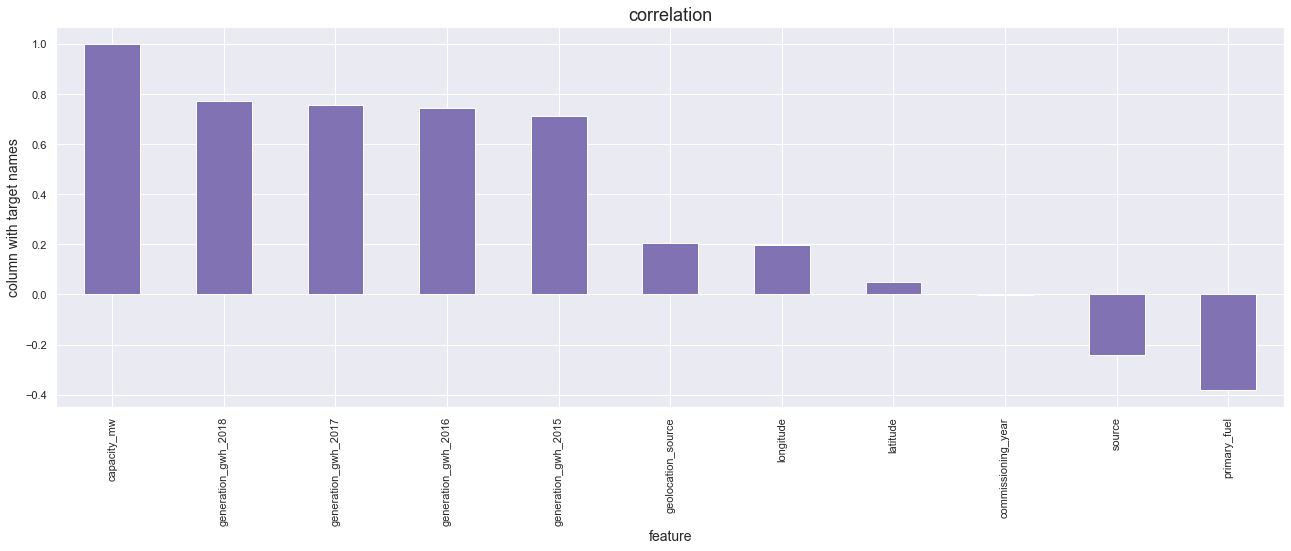

In [78]:
plt.figure(figsize=(22,7))
df_capacity.corr()['capacity_mw'].sort_values(ascending=False).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

SOURCE AND PRIMARY FUEL ARE NEGATIVELY CORRELATED

# Outliers Check

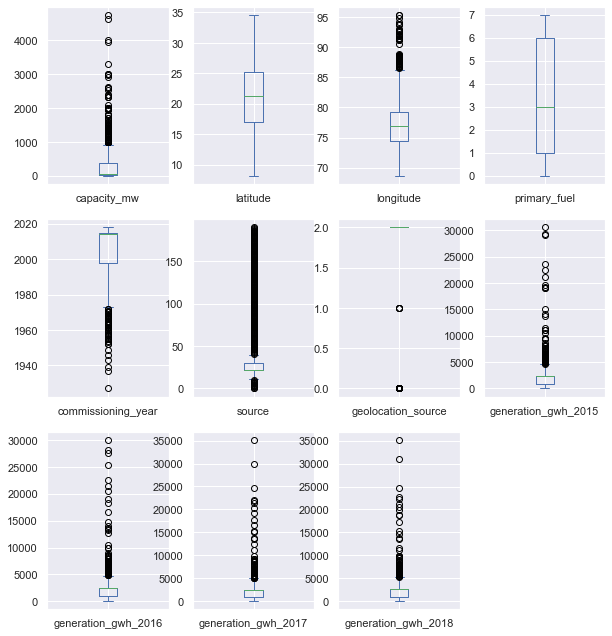

In [79]:
df_capacity.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,15))
plt.show()

# REMOVING OUTLIERS BY ZSCORE

In [80]:
from scipy.stats import zscore

z=np.abs(zscore(df_capacity))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.225688,0.407327,1.460215,1.083349,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.587311,0.593788,0.967877,0.661679,2.917019,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,0.116179,1.682394,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,0.439989,2.889052,0.529164,0.037788,0.489662,0.394241,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,0.125479,1.027976,0.967877,0.661679,0.489662,0.394241,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,0.725267,0.489662,0.394241,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,1.366853,0.145644,1.225688,0.661679,0.743019,2.560940,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.974707,0.391673,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.518793,0.772866,0.967877,0.661679,0.339596,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16


In [81]:
from scipy.stats import zscore

z=np.abs(zscore(df_capacity))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,1.149805,0.878280,1.225688,0.407327,1.460215,1.083349,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.587311,0.593788,0.967877,0.661679,2.917019,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,0.116179,1.682394,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,0.439989,2.889052,0.529164,0.037788,0.489662,0.394241,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,0.125479,1.027976,0.967877,0.661679,0.489662,0.394241,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,0.725267,0.489662,0.394241,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,1.366853,0.145644,1.225688,0.661679,0.743019,2.560940,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.974707,0.391673,1.664401,0.661679,0.512075,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.518793,0.772866,0.967877,0.661679,0.339596,0.394241,0.000000,0.000000,1.557412e-16,1.501244e-16


In [82]:
df1_capacity=df_capacity[(z<3).all(axis=1)]
df1_capacity


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,77,0,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,59,2,2428.226946,2467.936859,2547.759305,2600.804099


In [83]:
df1_capacity.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,174,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,21,2,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,22,2,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,5916.370000,6243.000000,5385.579736,7279.000000


# SPLITTING THE DATASET


In [84]:
#independent column
a=df1_capacity.drop(['capacity_mw'],axis=1)
#target
b=df1_capacity['capacity_mw']

In [85]:
a.shape

(836, 10)

In [86]:
b.shape

(836,)

# SKEWNESS CHECK


In [88]:
df1_capacity.skew()

capacity_mw            1.953584
latitude              -0.112788
longitude              0.912092
primary_fuel           0.414735
commissioning_year    -1.506227
source                 1.788418
geolocation_source    -2.108238
generation_gwh_2015    1.436056
generation_gwh_2016    1.424378
generation_gwh_2017    1.312563
generation_gwh_2018    1.357218
dtype: float64

In [89]:
# REMOVING SKEWNESS
from sklearn.preprocessing import power_transform
df1_capacity=power_transform(a,method='yeo-johnson')


df1_capacity

array([[ 1.15931032, -0.93104874,  1.13215015, ...,  0.36399394,
         0.36449097,  0.37948763],
       [ 0.59337566, -0.51415041, -1.01948777, ...,  0.36399394,
         0.36449097,  0.37948763],
       [ 0.12303801, -2.3556946 ,  1.40614067, ...,  0.36399394,
         0.36449097,  0.37948763],
       ...,
       [-0.95068109, -0.24113149,  1.40614067, ...,  0.36399394,
         0.36449097,  0.37948763],
       [ 0.52475542, -0.77189965, -1.01948777, ...,  0.36399394,
         0.36449097,  0.37948763],
       [-1.79587862,  0.2419579 ,  1.40614067, ...,  0.36399394,
         0.36449097,  0.37948763]])

# Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a=sc.fit_transform(a)
a

array([[ 1.15424116, -0.88928683,  1.17225864, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [ 0.59783917, -0.57132438, -0.98920634, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [ 0.13181017, -1.78800773,  1.60455163, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       ...,
       [-0.94726064, -0.34542998,  1.60455163, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [ 0.53006349, -0.77147132, -0.98920634, ...,  0.1753934 ,
         0.17612711,  0.18457261],
       [-1.81686668,  0.09508849,  1.60455163, ...,  0.1753934 ,
         0.17612711,  0.18457261]])

# Splitting the DataFrame and Model selection

In [91]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.22,random_state=123)


# 1) LinearRegression


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(a_train,b_train)
lr.score(a_train,b_train)
predlr=lr.predict(a_test)


print('Score: ',lr.score(a_train,b_train))
print('r2 score: ', r2_score(b_test,predlr))


# printing errors

print('Mean absolute error:', mean_absolute_error(b_test,predlr))
print('Mean squared error:', mean_squared_error(b_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(b_test,predlr)))


Score:  0.5116502329117402
r2 score:  0.6109803692804869
Mean absolute error: 212.48692181200155
Mean squared error: 87784.92814749749
Root mean squared error: 296.28521418980307


Cross Validation



In [93]:
test_accuracy= r2_score(b_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,a,b,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 49.47563318094522 and Accuracy score is 61.09803692804869
At cross fold 3 the Cross Val score is 51.71723667857987 and Accuracy score is 61.09803692804869
At cross fold 4 the Cross Val score is 51.15515001159581 and Accuracy score is 61.09803692804869
At cross fold 5 the Cross Val score is 51.761654045784375 and Accuracy score is 61.09803692804869
At cross fold 6 the Cross Val score is 51.631656977041715 and Accuracy score is 61.09803692804869
At cross fold 7 the Cross Val score is 50.31942715760241 and Accuracy score is 61.09803692804869
At cross fold 8 the Cross Val score is 51.48270410534626 and Accuracy score is 61.09803692804869
At cross fold 9 the Cross Val score is 49.81856063924713 and Accuracy score is 61.09803692804869


# Decision Tree Regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(a_train,b_train)
dtc.score(a_train,b_train)
dtc_pred=dtc.predict(a_test)


print('score : ',dtc.score(a_train,b_train))
print('r2 score : ',r2_score(b_test,dtc_pred))

# printing errors

print('Mean absolute error:', mean_absolute_error(b_test,dtc_pred))
print('Mean squared error:', mean_squared_error(b_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(b_test,dtc_pred)))


score :  0.9998686297432365
r2 score :  0.6993851429561966
Mean absolute error: 132.51107699275363
Mean squared error: 67835.78910105843
Root mean squared error: 260.4530458663489


Cross Validation



In [95]:
# DESICION TREE

test_accuracy= r2_score(b_test,dtc_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtc,a,b,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 59.320634831341515 and Accuracy score is 69.93851429561965
At cross fold 3 the Cross Val score is 54.40482035581392 and Accuracy score is 69.93851429561965
At cross fold 4 the Cross Val score is 59.20102126081318 and Accuracy score is 69.93851429561965
At cross fold 5 the Cross Val score is 56.42540384990161 and Accuracy score is 69.93851429561965
At cross fold 6 the Cross Val score is 59.041311672402976 and Accuracy score is 69.93851429561965
At cross fold 7 the Cross Val score is 55.62848719342816 and Accuracy score is 69.93851429561965
At cross fold 8 the Cross Val score is 55.2931012686213 and Accuracy score is 69.93851429561965
At cross fold 9 the Cross Val score is 57.46199003167399 and Accuracy score is 69.93851429561965


# Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(a_train,b_train)
predrf=rf.predict(a_test)
print('Score: ',rf.score(a_train,b_train))
print('r2 score: ', r2_score(b_test,predrf))

# printing errors

print('Mean absolute error:', mean_absolute_error(b_test,predrf))
print('Mean squared error:', mean_squared_error(b_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(b_test,predrf)))

Score:  0.9638004897587595
r2 score:  0.8797843545093881
Mean absolute error: 85.62959089128074
Mean squared error: 27127.478842339708
Root mean squared error: 164.70421622514618


Cross Validation



In [97]:
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(b_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,a,b,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")


At cross fold 2 the Cross Val score is 75.98267342765668 and Accuracy score is 87.9784354509388
At cross fold 3 the Cross Val score is 77.8393169344052 and Accuracy score is 87.9784354509388
At cross fold 4 the Cross Val score is 76.87449160635971 and Accuracy score is 87.9784354509388
At cross fold 5 the Cross Val score is 77.54408065058679 and Accuracy score is 87.9784354509388
At cross fold 6 the Cross Val score is 77.71583339920625 and Accuracy score is 87.9784354509388
At cross fold 7 the Cross Val score is 76.84514319176226 and Accuracy score is 87.9784354509388
At cross fold 8 the Cross Val score is 78.11763128070584 and Accuracy score is 87.9784354509388
At cross fold 9 the Cross Val score is 76.69955420000785 and Accuracy score is 87.9784354509388


# Support Vector Regressor

In [98]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(a_train,b_train)
preds= svr.predict(a_test)
print('Score: ',svr.score(a_train,b_train))
print('r2 score: ', r2_score(b_test,preds))

# printing errors

print('Mean absolute error:', mean_absolute_error(b_test,preds))
print('Mean squared error:', mean_squared_error(b_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(b_test,preds)))

Score:  -0.1987587886676947
r2 score:  -0.19796089787855942
Mean absolute error: 268.1187144337326
Mean squared error: 270328.03241645254
Root mean squared error: 519.930795795414


Cross Validation



# Extra Trees Regressor

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

ETR=ExtraTreesRegressor()
ETR.fit(a_train,b_train)
pred_ETR=ETR.predict(a_test)

print('Score: ',ETR.score(a_train,b_train))
print('r2 score: ', r2_score(b_test,pred_ETR))

# printing errors

print('Mean absolute error:', mean_absolute_error(b_test,pred_ETR))
print('Mean squared error:', mean_squared_error(b_test,pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(b_test,pred_ETR)))

Score:  0.9998686297432365
r2 score:  0.8714691503066628
Mean absolute error: 83.98647292572464
Mean squared error: 29003.861281235982
Root mean squared error: 170.30520039398675


In [100]:
test_accuracy= r2_score(b_test,pred_ETR)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETR,a,b,cv=i,n_jobs=3)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 77.74442095874714 and Accuracy score is 87.14691503066628
At cross fold 3 the Cross Val score is 79.74020770320665 and Accuracy score is 87.14691503066628
At cross fold 4 the Cross Val score is 79.22978600406434 and Accuracy score is 87.14691503066628
At cross fold 5 the Cross Val score is 79.68072541413164 and Accuracy score is 87.14691503066628
At cross fold 6 the Cross Val score is 79.75845313692949 and Accuracy score is 87.14691503066628
At cross fold 7 the Cross Val score is 78.6764181734781 and Accuracy score is 87.14691503066628
At cross fold 8 the Cross Val score is 79.88608852345064 and Accuracy score is 87.14691503066628
At cross fold 9 the Cross Val score is 79.01325852025394 and Accuracy score is 87.14691503066628


# HYPERPARAMETER TUNING

In [101]:
from sklearn.model_selection import GridSearchCV

par_etr={'criterion' : ["mse", "mae"],'max_features':['auto','sqrt','log2']}
gcv_etr= GridSearchCV(ETR,par_etr) 
gcv_etr.fit(a_train,b_train)
gcv_etr.best_params_


{'criterion': 'mse', 'max_features': 'log2'}

In [102]:
mod1= ExtraTreesRegressor(criterion='mae', max_features='sqrt', random_state=11)
mod1.fit(a_train,b_train)
pred1=mod1.predict(a_test)
print('Score: ',mod1.score(a_train,b_train))
print('r2 score: ', r2_score(b_test,pred1))

Score:  0.9988592835930606
r2 score:  0.8647723807916703


# Extra Trees Regressor is Best

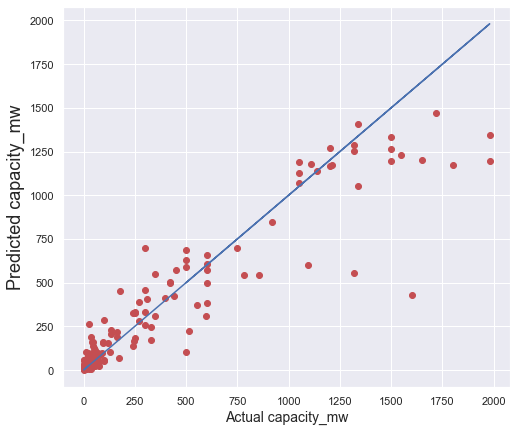

In [103]:
#ExtraTreesRegressor
plt.figure(figsize=(8,7))
plt.scatter(x=b_test, y= pred1, color='r')
plt.plot(b_test,b_test, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('Predicted capacity_mw', fontsize= 18)
plt.show()

# Final Prediction

In [104]:
z = np.array(b_test)
predicted = np.array(mod1.predict(a_test))
df = pd.DataFrame(zip(z,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,27.65,21.7125
1,24.00,34.4300
2,100.00,49.4425
3,1094.00,602.3680
4,66.00,58.6185
...,...,...
179,50.00,126.2130
180,600.00,386.2454
181,56.25,22.6665
182,12.00,10.5110


# Saving the Model With Extra Trees Regressor

In [105]:
# save the model to disk
import pickle

filename = 'POWER_PLANT_capacity.pkl'
pickle.dump(mod1, open(filename, 'wb'))

In [106]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(a_test,b_test)
print(result)


0.8647723807916703
